In [0]:
import torch
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn as nn

# Creación del dataset

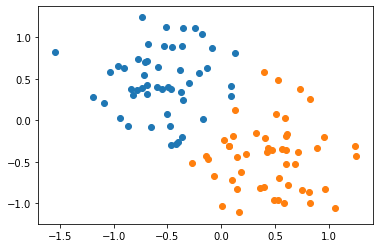

In [0]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]
#Función de scikit-learn para generar automáticamente dos grupos de puntos.
X, y = datasets.make_blobs(n_samples=n_pts,n_features=2, centers=centers ,random_state=42, cluster_std=0.4)

def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

scatter_plot()

In [0]:
X_data = torch.Tensor(X)
y_data = torch.Tensor(y)

# Creación del modelo

In [0]:
class Model(nn.Module):
  
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear =  nn.Linear(input_size, output_size)

  def forward(self, x):
    #La función sigmoide se usa como activador luego de pasar por la capa
    #Atributo que asigna resultados de regresión multinomial o logística 
    #(probabilidades logísticas) a probabilidades, 
    #y devuelve un valor entre 0 y 1.
    #https://ml4a.github.io/ml4a/es/neural_networks/
    pred =  torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    p = self.forward(x)
    if(p >= 0.5):
      return 1
    else:
      return 0



In [0]:
torch.manual_seed(42)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5406, 0.5869]], requires_grad=True), Parameter containing:
tensor([-0.1657], requires_grad=True)]


In [0]:
[w , b ]  = model.parameters()
w1 , w2 = w.view(2)

def get_params():
  return (w1.item(), w2.item(), b[0].item())

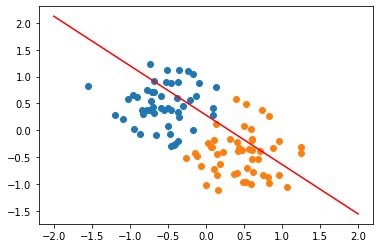

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2  = (w1*x1 + b1 ) / -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

plot_fit("Modelo inicial")


# Entrenamiento del modelo

In [0]:
#Como métrica para saber qué tan buena es nuestra clasificación, usaremos
#BCE:  Binary Cross Entropy 
# Esta métrica es especial para clasificaciones entre 2 categorías
#http://www.diegocalvo.es/funcion-de-coste-redes-neuronales/

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(X_data)
  loss = criterion(y_pred, y_data)
  losses.append(loss.item())
  print("Epoch: ", i, ", Loss: ", loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch:  0 , Loss:  0.7053976655006409
Epoch:  1 , Loss:  0.6994141340255737
Epoch:  2 , Loss:  0.6935172080993652
Epoch:  3 , Loss:  0.6877051591873169
Epoch:  4 , Loss:  0.6819769144058228
Epoch:  5 , Loss:  0.6763314604759216
Epoch:  6 , Loss:  0.6707678437232971
Epoch:  7 , Loss:  0.6652840971946716
Epoch:  8 , Loss:  0.6598799228668213
Epoch:  9 , Loss:  0.6545533537864685
Epoch:  10 , Loss:  0.6493039131164551
Epoch:  11 , Loss:  0.6441301703453064
Epoch:  12 , Loss:  0.6390308141708374
Epoch:  13 , Loss:  0.6340047717094421
Epoch:  14 , Loss:  0.6290510296821594
Epoch:  15 , Loss:  0.6241685748100281
Epoch:  16 , Loss:  0.6193559169769287
Epoch:  17 , Loss:  0.614612340927124
Epoch:  18 , Loss:  0.6099364757537842
Epoch:  19 , Loss:  0.605327308177948
Epoch:  20 , Loss:  0.6007840633392334
Epoch:  21 , Loss:  0.596305251121521
Epoch:  22 , Loss:  0.5918900966644287
Epoch:  23 , Loss:  0.5875375866889954
Epoch:  24 , Loss:  0.5832464694976807
Epoch:  25 , Loss:  0.5790162086486816

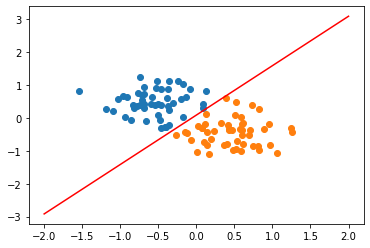

In [0]:
plot_fit("Modelo Final")

# Predicciones

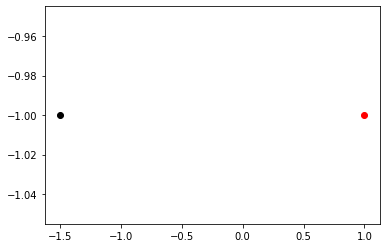

In [0]:
#Creamos dos puntos de prueba y los graficamos
test_point = torch.Tensor([1.0, -1.0])
test_point2 = torch.Tensor([-1.5, 0.0])

plt.plot(test_point[0], test_point[1], 'ro')
plt.plot(test_point2[0], test_point[1], 'ko')

In [0]:
#los enviamos al modelo, sin actualizar gradientes ni parámetros.
#solo con forward()
print("Point 1 probability is {}".format(model.forward(test_point).item()))
print("Point 2 probability is {}".format(model.forward(test_point2).item()))

Point 1 probability is 0.9979574680328369
Point 2 probability is 0.0055202157236635685


In [0]:
#Usamos la función predict()
#Para inferir la categoría a la que pertenecen
print("Predicted class of point 1: {}".format(model.predict(test_point)))
print("Predicted class of point 2: {}".format(model.predict(test_point2)))

Predicted class of point 1: 1
Predicted class of point 2: 0
